In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Dataset

In [2]:
dataset = np.array([[141, 16.8, 0],[154, 15.2, 0],[210, 11.4, 1],[185, 14.1, 1]])

In [3]:
dataset

array([[141. ,  16.8,   0. ],
       [154. ,  15.2,   0. ],
       [210. ,  11.4,   1. ],
       [185. ,  14.1,   1. ]])

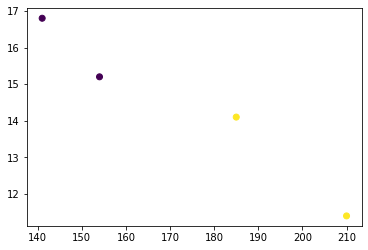

In [4]:
# plot data
plt.scatter(x = dataset[:,0], y = dataset[:,1], c = dataset[:,2])

In [5]:
# data splitting
X = dataset[:,0:2]
Y = dataset[:,2]
X

array([[141. ,  16.8],
       [154. ,  15.2],
       [210. ,  11.4],
       [185. ,  14.1]])

### Normalization

In [7]:
X[:,0] = (X[:,0] - X[:,0].min()) / (X[:,0].max() - X[:,0].min())
X[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min())

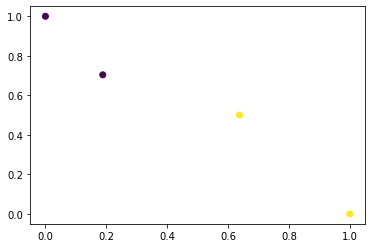

In [8]:
plt.scatter(x = X[:,0], y = X[:,1], c = Y)

### Function

![alt text](Fig1.jpg "Model")

In [9]:
def f(x, w, b):
   
    # calculate the output of perceptron
    # Activation : Sigmoid
    
    F = 1 / (1 + np.exp(-((w * x).sum() + b)))
    
    return F

## Loss Functions

### Cross Entropy

In [10]:
def cross_entropy(x, y, w, b):
    '''Cross Entropy loss function'''
    
    L = 0.0
    
    for i in range(x.shape[0]):
        L += -(y[i] * np.log(f(x[i], w, b)))
        
    return L

In [11]:
def grad_CE(x, y, w, b):
    fx = f(x, w, b)
    
    dw = (-y) * (1 - fx) * x
    db = (-y) * (1 - fx)
    
    return dw, db

### MSE

In [12]:
def MSE(x, y, w, b):
    '''Mean Squared Loss Function'''
    
    L = 0.0
    
    for i in range(x.shape[0]):
        L += 0.5 * (y[i] - f(x[i], w, b)) ** 2
        
    return L

In [13]:
def grad_MSE(x, y, w, b):
    fx = f(x, w, b)
    
    dw = (fx - y) * fx * (1 - fx) * x
    db = (fx - y) * fx * (1 - fx)
    
    return dw, db

### Gradient Descent (GD)

In [19]:
def gradient_descent(x, y, epoch, loss, lr):
    w = [0.1, 0.2]
    b = 0.0
    
    l_list = []
    w_list = []
    b_list = []
    
    for i in range(epoch):
        dw, db = 0,0
        
        for j in range(x.shape[0]):
            if (loss == 'MSE'):
                dw, db = grad_MSE(x[j], y[j], w, b)
            elif (loss == 'CE'):
                dw, db = grad_CE(x[j], y[j], w, b)
            
            w = w - lr * dw
            #print(w , dw)
            b = b - lr * db
            
            dw, db = 0,0
        
        if (loss == 'MSE'):
            l_list.append(MSE(x, y, w, b))
            
        elif (loss == 'CE'):
            l_list.append(cross_entropy(x, y, w, b))
        
        w_list.append(w[0])
        b_list.append(b)
    
    return l_list

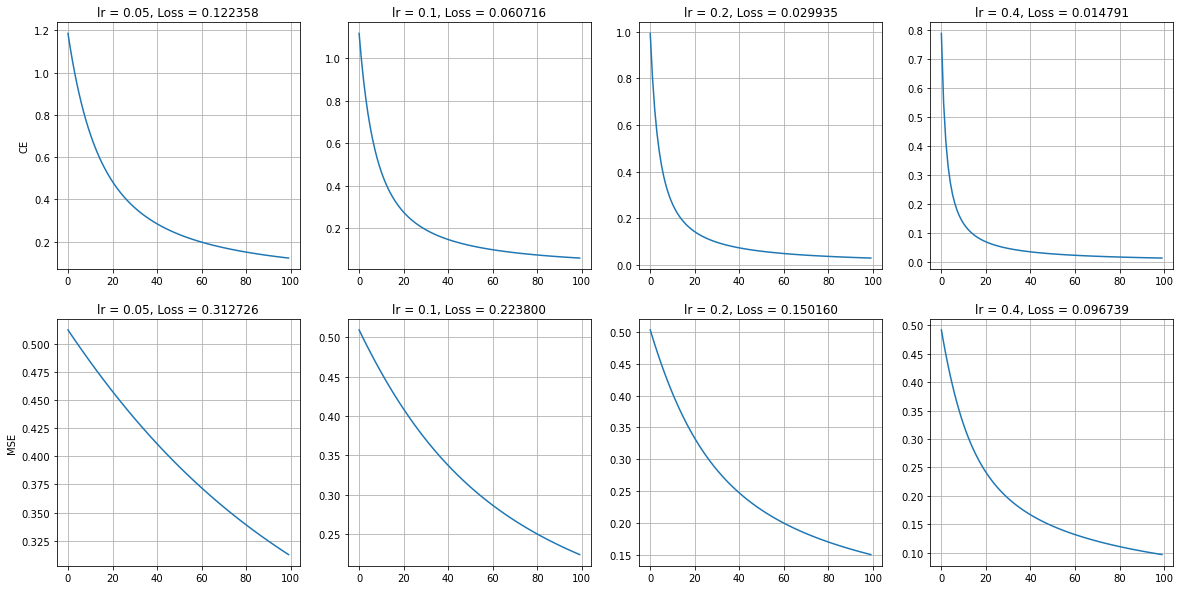

In [66]:
fig, axs = plt.subplots(2, 4, figsize=(20,10))

axs00_loss = gradient_descent(X, Y, 100, 'CE', 0.05)
axs[0, 0].plot(axs00_loss)
axs[0, 0].set_title("lr = 0.05, Loss = %f"%axs00_loss[-1])
axs[0, 0].set_ylabel('CE')
axs[0, 0].grid()

axs01_loss = gradient_descent(X, Y, 100, 'CE', 0.1)
axs[0, 1].plot(axs01_loss)
axs[0, 1].set_title("lr = 0.1, Loss = %f"%axs01_loss[-1])
axs[0, 1].grid()

axs02_loss = gradient_descent(X, Y, 100, 'CE', 0.2)
axs[0, 2].plot(axs02_loss)
axs[0, 2].set_title("lr = 0.2, Loss = %f"%axs02_loss[-1])
axs[0, 2].grid()

axs03_loss = gradient_descent(X, Y, 100, 'CE', 0.4)
axs[0, 3].plot(axs03_loss)
axs[0, 3].set_title("lr = 0.4, Loss = %f"%axs03_loss[-1])
axs[0, 3].grid()


axs10_loss = gradient_descent(X, Y, 100, 'MSE', 0.05)
axs[1, 0].plot(axs10_loss)
axs[1, 0].set_title("lr = 0.05, Loss = %f"%axs10_loss[-1])
axs[1, 0].set_ylabel('MSE')
axs[1, 0].grid()

axs11_loss = gradient_descent(X, Y, 100, 'MSE', 0.1)
axs[1, 1].plot(axs11_loss)
axs[1, 1].set_title("lr = 0.1, Loss = %f"%axs11_loss[-1])
axs[1, 1].grid()

axs12_loss = gradient_descent(X, Y, 100, 'MSE', 0.2)
axs[1, 2].plot(axs12_loss)
axs[1, 2].set_title("lr = 0.2, Loss = %f"%axs12_loss[-1])
axs[1, 2].grid()

axs13_loss = gradient_descent(X, Y, 100, 'MSE', 0.4)
axs[1, 3].plot(axs13_loss)
axs[1, 3].set_title("lr = 0.4, Loss = %f"%axs13_loss[-1])
axs[1, 3].grid()

plt.savefig('GD.jpg',dpi = 300)

### Stochastic Gradient Descent (SGD)

In [88]:
def stochastic_gradient_descent(x, y, epoch, batch_size, loss, lr):
    w = [0.1, 0.2]
    b = 0.0
    
    l_list = []
    w_list = []
    b_list = []
    
    for i in range(epoch):
        dw, db = 0,0
        
        for _ in range(batch_size):
            
            j = np.random.randint(0,x.shape[0])
            
            if (loss == 'MSE'):
                dw, db = grad_MSE(x[j], y[j], w, b)
            elif (loss == 'CE'):
                dw, db = grad_CE(x[j], y[j], w, b)
            
            w = w - lr * dw
            b = b - lr * db
            
            dw, db = 0,0
        
        if (loss == 'MSE'):
            l_list.append(MSE(x, y, w, b))
            
        elif (loss == 'CE'):
            l_list.append(cross_entropy(x, y, w, b))
        
        w_list.append(w[0])
        b_list.append(b)
    
    return l_list

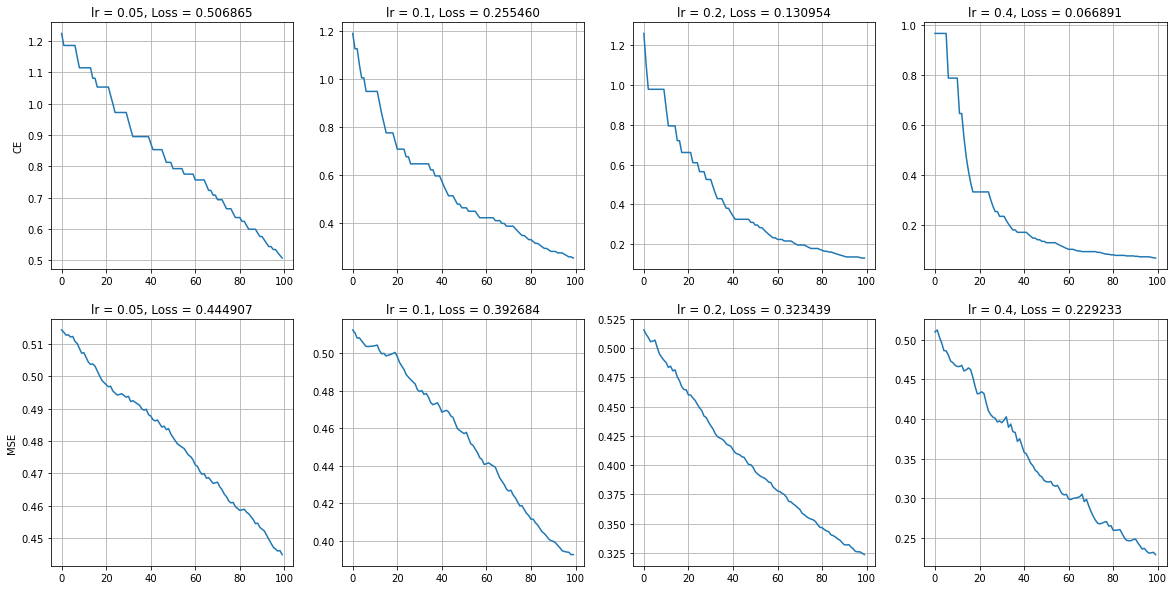

In [95]:
fig, axs = plt.subplots(2, 4, figsize=(20,10))

axs00_loss = stochastic_gradient_descent(X, Y, 100, 1, 'CE', 0.05)
axs[0, 0].plot(axs00_loss)
axs[0, 0].set_title("lr = 0.05, Loss = %f"%axs00_loss[-1])
axs[0, 0].set_ylabel('CE')
axs[0, 0].grid()

axs01_loss = stochastic_gradient_descent(X, Y, 100, 1, 'CE', 0.1)
axs[0, 1].plot(axs01_loss)
axs[0, 1].set_title("lr = 0.1, Loss = %f"%axs01_loss[-1])
axs[0, 1].grid()

axs02_loss = stochastic_gradient_descent(X, Y, 100, 1, 'CE', 0.2)
axs[0, 2].plot(axs02_loss)
axs[0, 2].set_title("lr = 0.2, Loss = %f"%axs02_loss[-1])
axs[0, 2].grid()

axs03_loss = stochastic_gradient_descent(X, Y, 100, 1, 'CE', 0.4)
axs[0, 3].plot(axs03_loss)
axs[0, 3].set_title("lr = 0.4, Loss = %f"%axs03_loss[-1])
axs[0, 3].grid()


axs10_loss = stochastic_gradient_descent(X, Y, 100, 1, 'MSE', 0.05)
axs[1, 0].plot(axs10_loss)
axs[1, 0].set_title("lr = 0.05, Loss = %f"%axs10_loss[-1])
axs[1, 0].set_ylabel('MSE')
axs[1, 0].grid()

axs11_loss = stochastic_gradient_descent(X, Y, 100, 1, 'MSE', 0.1)
axs[1, 1].plot(axs11_loss)
axs[1, 1].set_title("lr = 0.1, Loss = %f"%axs11_loss[-1])
axs[1, 1].grid()

axs12_loss = stochastic_gradient_descent(X, Y, 100, 1, 'MSE', 0.2)
axs[1, 2].plot(axs12_loss)
axs[1, 2].set_title("lr = 0.2, Loss = %f"%axs12_loss[-1])
axs[1, 2].grid()

axs13_loss = stochastic_gradient_descent(X, Y, 100, 1, 'MSE', 0.4)
axs[1, 3].plot(axs13_loss)
axs[1, 3].set_title("lr = 0.4, Loss = %f"%axs13_loss[-1])
axs[1, 3].grid()

plt.savefig('SGD.jpg',dpi = 300)

### Gradient Descent (GD) + Momentum

In [96]:
def gradient_descent_momentum(x, y, epoch, loss, lr , beta):
    w = [0.1, 0.2]
    b = 0.0
    
    l_list = []
    w_list = []
    b_list = []
    
    # Speed
    vx_w = 0.0
    vx_b = 0.0
    
    for i in range(epoch):
        dw, db = 0,0
        
        for j in range(x.shape[0]):
            if (loss == 'MSE'):
                dw, db = grad_MSE(x[j], y[j], w, b)
            elif (loss == 'CE'):
                dw, db = grad_CE(x[j], y[j], w, b)
            
            # update vx
            vx_w = beta * vx_w + dw
            vx_b = beta * vx_b + db
            
            # x -= lr * vx
            w = w - (lr * vx_w)
            b = b - (lr * vx_b)
            
            dw, db = 0,0
        
        if (loss == 'MSE'):
            l_list.append(MSE(x, y, w, b))
            
        elif (loss == 'CE'):
            l_list.append(cross_entropy(x, y, w, b))
        
        w_list.append(w[0])
        b_list.append(b)
    
    return l_list

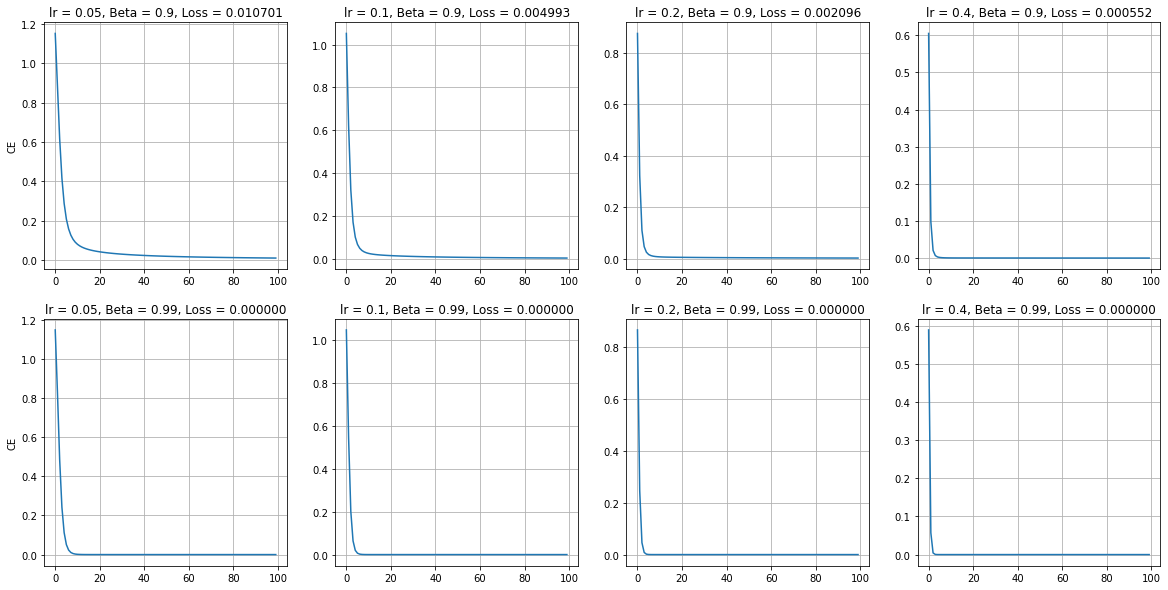

In [101]:
fig, axs = plt.subplots(2, 4, figsize=(20,10))

axs00_loss = gradient_descent_momentum(X, Y, 100, 'CE', 0.05 , 0.9)
axs[0, 0].plot(axs00_loss)
axs[0, 0].set_title("lr = 0.05, Beta = 0.9, Loss = %f"%axs00_loss[-1])
axs[0, 0].set_ylabel('CE')
axs[0, 0].grid()

axs01_loss = gradient_descent_momentum(X, Y, 100, 'CE', 0.1 , 0.9)
axs[0, 1].plot(axs01_loss)
axs[0, 1].set_title("lr = 0.1, Beta = 0.9, Loss = %f"%axs01_loss[-1])
axs[0, 1].grid()

axs02_loss = gradient_descent_momentum(X, Y, 100, 'CE', 0.2 , 0.9)
axs[0, 2].plot(axs02_loss)
axs[0, 2].set_title("lr = 0.2, Beta = 0.9, Loss = %f"%axs02_loss[-1])
axs[0, 2].grid()

axs03_loss = gradient_descent_momentum(X, Y, 100, 'CE', 0.4 , 0.9)
axs[0, 3].plot(axs03_loss)
axs[0, 3].set_title("lr = 0.4, Beta = 0.9, Loss = %f"%axs03_loss[-1])
axs[0, 3].grid()


axs10_loss = gradient_descent_momentum(X, Y, 100, 'CE', 0.05 , 0.99)
axs[1, 0].plot(axs10_loss)
axs[1, 0].set_title("lr = 0.05, Beta = 0.99, Loss = %f"%axs10_loss[-1])
axs[1, 0].set_ylabel('CE')
axs[1, 0].grid()

axs11_loss = gradient_descent_momentum(X, Y, 100, 'CE', 0.1 , 0.99)
axs[1, 1].plot(axs11_loss)
axs[1, 1].set_title("lr = 0.1, Beta = 0.99, Loss = %f"%axs11_loss[-1])
axs[1, 1].grid()

axs12_loss = gradient_descent_momentum(X, Y, 100, 'CE', 0.2 , 0.99)
axs[1, 2].plot(axs12_loss)
axs[1, 2].set_title("lr = 0.2, Beta = 0.99, Loss = %f"%axs12_loss[-1])
axs[1, 2].grid()

axs13_loss = gradient_descent_momentum(X, Y, 100, 'CE', 0.4 , 0.99)
axs[1, 3].plot(axs13_loss)
axs[1, 3].set_title("lr = 0.4, Beta = 0.99, Loss = %f"%axs13_loss[-1])
axs[1, 3].grid()

plt.savefig('GD_MOMENTUM.jpg',dpi = 300)

### SGD + Momentum

In [102]:
def stochastic_gradient_descent_momentum(x, y, epoch, batch_size, loss, lr, beta):
    w = [0.1, 0.2]
    b = 0.0
    
    l_list = []
    w_list = []
    b_list = []
    
    # Speed
    vx_w = 0.0
    vx_b = 0.0
    
    for i in range(epoch):
        dw, db = 0,0
        
        for _ in range(batch_size):
            
            j = np.random.randint(0,x.shape[0])
            
            if (loss == 'MSE'):
                dw, db = grad_MSE(x[j], y[j], w, b)
            elif (loss == 'CE'):
                dw, db = grad_CE(x[j], y[j], w, b)
            
            # update vx
            vx_w = beta * vx_w + dw
            vx_b = beta * vx_b + db
            
            # x -= lr * vx
            w = w - (lr * vx_w)
            b = b - (lr * vx_b)
            
            dw, db = 0,0
        
        if (loss == 'MSE'):
            l_list.append(MSE(x, y, w, b))
            
        elif (loss == 'CE'):
            l_list.append(cross_entropy(x, y, w, b))
        
        w_list.append(w[0])
        b_list.append(b)
    
    return l_list

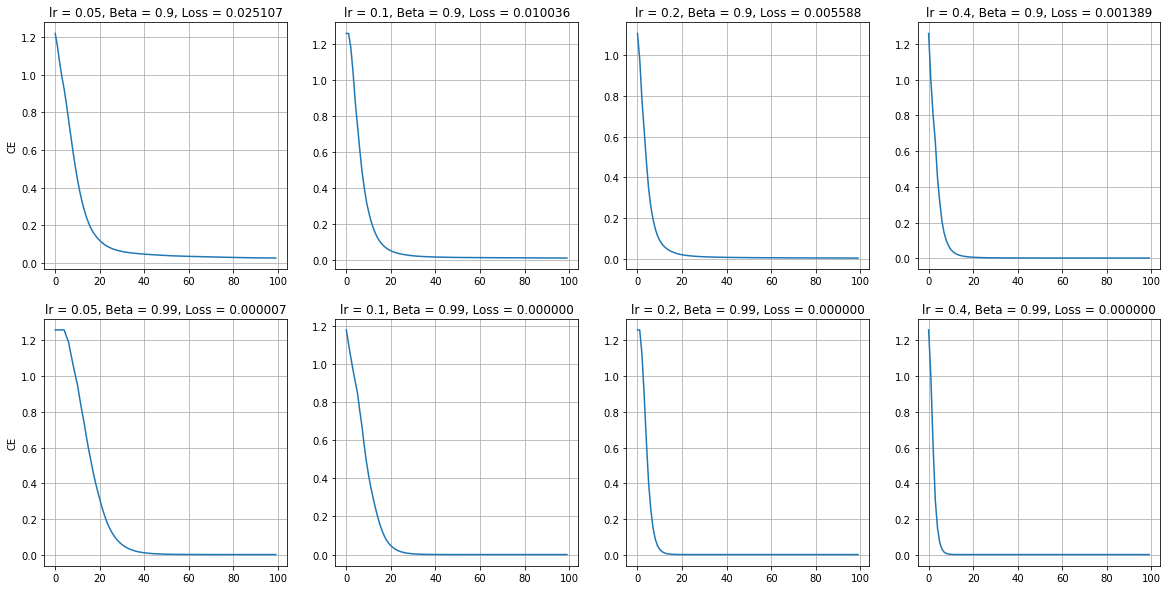

In [103]:
fig, axs = plt.subplots(2, 4, figsize=(20,10))

axs00_loss = stochastic_gradient_descent_momentum(X, Y, 100, 1, 'CE', 0.05 , 0.9)
axs[0, 0].plot(axs00_loss)
axs[0, 0].set_title("lr = 0.05, Beta = 0.9, Loss = %f"%axs00_loss[-1])
axs[0, 0].set_ylabel('CE')
axs[0, 0].grid()

axs01_loss = stochastic_gradient_descent_momentum(X, Y, 100, 1, 'CE', 0.1 , 0.9)
axs[0, 1].plot(axs01_loss)
axs[0, 1].set_title("lr = 0.1, Beta = 0.9, Loss = %f"%axs01_loss[-1])
axs[0, 1].grid()

axs02_loss = stochastic_gradient_descent_momentum(X, Y, 100, 1, 'CE', 0.2 , 0.9)
axs[0, 2].plot(axs02_loss)
axs[0, 2].set_title("lr = 0.2, Beta = 0.9, Loss = %f"%axs02_loss[-1])
axs[0, 2].grid()

axs03_loss = stochastic_gradient_descent_momentum(X, Y, 100, 1, 'CE', 0.4 , 0.9)
axs[0, 3].plot(axs03_loss)
axs[0, 3].set_title("lr = 0.4, Beta = 0.9, Loss = %f"%axs03_loss[-1])
axs[0, 3].grid()


axs10_loss = stochastic_gradient_descent_momentum(X, Y, 100, 1, 'CE', 0.05 , 0.99)
axs[1, 0].plot(axs10_loss)
axs[1, 0].set_title("lr = 0.05, Beta = 0.99, Loss = %f"%axs10_loss[-1])
axs[1, 0].set_ylabel('CE')
axs[1, 0].grid()

axs11_loss = stochastic_gradient_descent_momentum(X, Y, 100, 1, 'CE', 0.1 , 0.99)
axs[1, 1].plot(axs11_loss)
axs[1, 1].set_title("lr = 0.1, Beta = 0.99, Loss = %f"%axs11_loss[-1])
axs[1, 1].grid()

axs12_loss = stochastic_gradient_descent_momentum(X, Y, 100, 1, 'CE', 0.2 , 0.99)
axs[1, 2].plot(axs12_loss)
axs[1, 2].set_title("lr = 0.2, Beta = 0.99, Loss = %f"%axs12_loss[-1])
axs[1, 2].grid()

axs13_loss = stochastic_gradient_descent_momentum(X, Y, 100, 1, 'CE', 0.4 , 0.99)
axs[1, 3].plot(axs13_loss)
axs[1, 3].set_title("lr = 0.4, Beta = 0.99, Loss = %f"%axs13_loss[-1])
axs[1, 3].grid()

plt.savefig('SGD_MOMENTUM.jpg',dpi = 300)

### GD + Nesterov Momentum

In [119]:
def gradient_descent_nesterov(x, y, epoch, loss, lr, beta):
    w = [0.1, 0.2]
    b = 0.0
    
    l_list = []
    w_list = []
    b_list = []
    
    vx_w = 0
    vx_b = 0
    
    for i in range(epoch):
        dw, db = 0,0
        
        for j in range(x.shape[0]):
            if (loss == 'MSE'):
                dw, db = grad_MSE(x[j], y[j], w, b)
            elif (loss == 'CE'):
                dw, db = grad_CE(x[j], y[j], w, b)
            
            # old speed
            old_v_w = vx_w
            old_v_b = vx_b
            
            # update vx
            vx_w = (beta * vx_w) - (lr * dw)
            vx_b = (beta * vx_b) - (lr * db)
            
            # x += -beta * old_v + (1+beta) * v
            w = [x + y for x, y in zip(w, ((-1 * beta) * old_v_w) + ((1 + beta) * vx_w))]
            b = b + ((-1 * beta) * old_v_b) + ((1 + beta) * vx_b)
            
            dw, db = 0,0
        
        if (loss == 'MSE'):
            l_list.append(MSE(x, y, w, b))
            
        elif (loss == 'CE'):
            l_list.append(cross_entropy(x, y, w, b))
        
        w_list.append(w[0])
        b_list.append(b)
    
    return l_list

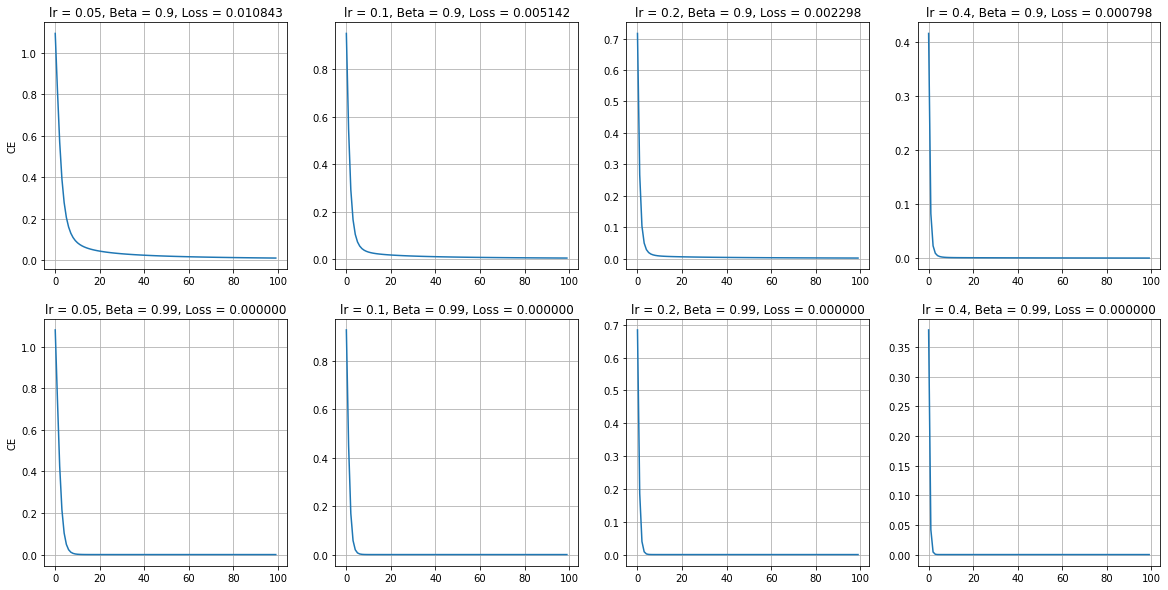

In [120]:
fig, axs = plt.subplots(2, 4, figsize=(20,10))

axs00_loss = gradient_descent_nesterov(X, Y, 100, 'CE', 0.05 , 0.9)
axs[0, 0].plot(axs00_loss)
axs[0, 0].set_title("lr = 0.05, Beta = 0.9, Loss = %f"%axs00_loss[-1])
axs[0, 0].set_ylabel('CE')
axs[0, 0].grid()

axs01_loss = gradient_descent_nesterov(X, Y, 100, 'CE', 0.1 , 0.9)
axs[0, 1].plot(axs01_loss)
axs[0, 1].set_title("lr = 0.1, Beta = 0.9, Loss = %f"%axs01_loss[-1])
axs[0, 1].grid()

axs02_loss = gradient_descent_nesterov(X, Y, 100, 'CE', 0.2 , 0.9)
axs[0, 2].plot(axs02_loss)
axs[0, 2].set_title("lr = 0.2, Beta = 0.9, Loss = %f"%axs02_loss[-1])
axs[0, 2].grid()

axs03_loss = gradient_descent_nesterov(X, Y, 100, 'CE', 0.4 , 0.9)
axs[0, 3].plot(axs03_loss)
axs[0, 3].set_title("lr = 0.4, Beta = 0.9, Loss = %f"%axs03_loss[-1])
axs[0, 3].grid()


axs10_loss = gradient_descent_nesterov(X, Y, 100, 'CE', 0.05 , 0.99)
axs[1, 0].plot(axs10_loss)
axs[1, 0].set_title("lr = 0.05, Beta = 0.99, Loss = %f"%axs10_loss[-1])
axs[1, 0].set_ylabel('CE')
axs[1, 0].grid()

axs11_loss = gradient_descent_nesterov(X, Y, 100, 'CE', 0.1 , 0.99)
axs[1, 1].plot(axs11_loss)
axs[1, 1].set_title("lr = 0.1, Beta = 0.99, Loss = %f"%axs11_loss[-1])
axs[1, 1].grid()

axs12_loss = gradient_descent_nesterov(X, Y, 100, 'CE', 0.2 , 0.99)
axs[1, 2].plot(axs12_loss)
axs[1, 2].set_title("lr = 0.2, Beta = 0.99, Loss = %f"%axs12_loss[-1])
axs[1, 2].grid()

axs13_loss = gradient_descent_nesterov(X, Y, 100, 'CE', 0.4 , 0.99)
axs[1, 3].plot(axs13_loss)
axs[1, 3].set_title("lr = 0.4, Beta = 0.99, Loss = %f"%axs13_loss[-1])
axs[1, 3].grid()

plt.savefig('GD_NESTEROV.jpg',dpi = 300)

### SGD + Nesterov Momentum

In [121]:
def stochastic_gradient_descent_nestrov(x, y, epoch, batch_size, loss, lr, beta):
    w = [0.1, 0.2]
    b = 0.0
    
    l_list = []
    w_list = []
    b_list = []
    
    # Speed
    vx_w = 0.0
    vx_b = 0.0
    
    for i in range(epoch):
        dw, db = 0,0
        
        for _ in range(batch_size):
            
            j = np.random.randint(0,x.shape[0])
            
            if (loss == 'MSE'):
                dw, db = grad_MSE(x[j], y[j], w, b)
            elif (loss == 'CE'):
                dw, db = grad_CE(x[j], y[j], w, b)
            
            # old speed
            old_v_w = vx_w
            old_v_b = vx_b
            
            # update vx
            vx_w = (beta * vx_w) - (lr * dw)
            vx_b = (beta * vx_b) - (lr * db)
            
            # x += -beta * old_v + (1+beta) * v
            w = [x + y for x, y in zip(w, ((-1 * beta) * old_v_w) + ((1 + beta) * vx_w))]
            b = b + ((-1 * beta) * old_v_b) + ((1 + beta) * vx_b)
            
            dw, db = 0,0
        
        if (loss == 'MSE'):
            l_list.append(MSE(x, y, w, b))
            
        elif (loss == 'CE'):
            l_list.append(cross_entropy(x, y, w, b))
        
        w_list.append(w[0])
        b_list.append(b)
    
    return l_list

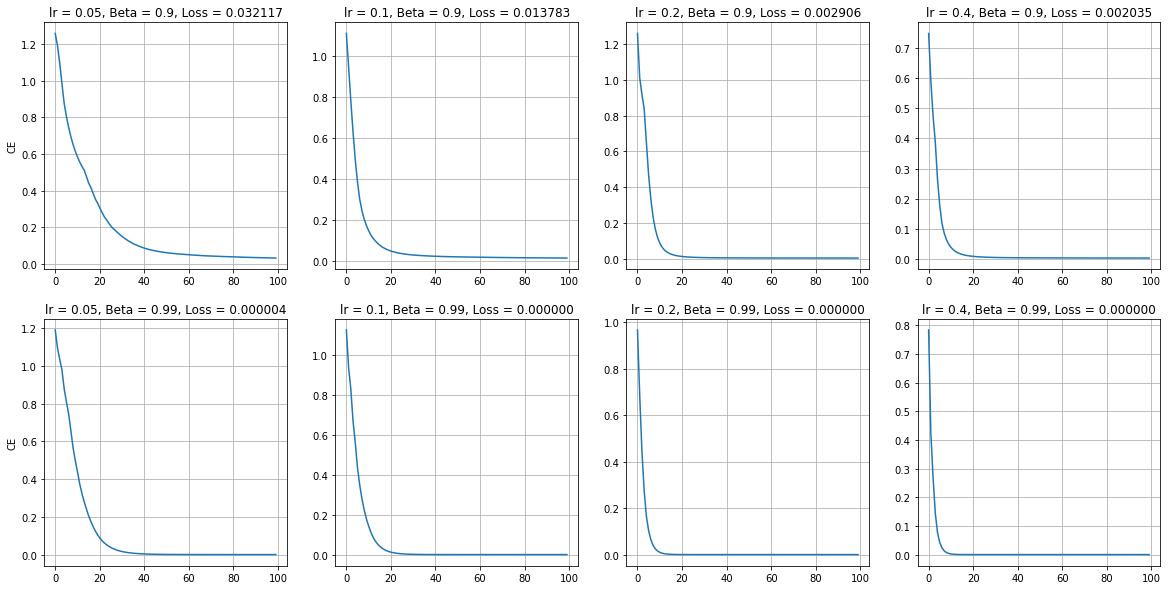

In [122]:
fig, axs = plt.subplots(2, 4, figsize=(20,10))

axs00_loss = stochastic_gradient_descent_nestrov(X, Y, 100, 1, 'CE', 0.05 , 0.9)
axs[0, 0].plot(axs00_loss)
axs[0, 0].set_title("lr = 0.05, Beta = 0.9, Loss = %f"%axs00_loss[-1])
axs[0, 0].set_ylabel('CE')
axs[0, 0].grid()

axs01_loss = stochastic_gradient_descent_nestrov(X, Y, 100, 1, 'CE', 0.1 , 0.9)
axs[0, 1].plot(axs01_loss)
axs[0, 1].set_title("lr = 0.1, Beta = 0.9, Loss = %f"%axs01_loss[-1])
axs[0, 1].grid()

axs02_loss = stochastic_gradient_descent_nestrov(X, Y, 100, 1, 'CE', 0.2 , 0.9)
axs[0, 2].plot(axs02_loss)
axs[0, 2].set_title("lr = 0.2, Beta = 0.9, Loss = %f"%axs02_loss[-1])
axs[0, 2].grid()

axs03_loss = stochastic_gradient_descent_nestrov(X, Y, 100, 1, 'CE', 0.4 , 0.9)
axs[0, 3].plot(axs03_loss)
axs[0, 3].set_title("lr = 0.4, Beta = 0.9, Loss = %f"%axs03_loss[-1])
axs[0, 3].grid()


axs10_loss = stochastic_gradient_descent_nestrov(X, Y, 100, 1, 'CE', 0.05 , 0.99)
axs[1, 0].plot(axs10_loss)
axs[1, 0].set_title("lr = 0.05, Beta = 0.99, Loss = %f"%axs10_loss[-1])
axs[1, 0].set_ylabel('CE')
axs[1, 0].grid()

axs11_loss = stochastic_gradient_descent_nestrov(X, Y, 100, 1, 'CE', 0.1 , 0.99)
axs[1, 1].plot(axs11_loss)
axs[1, 1].set_title("lr = 0.1, Beta = 0.99, Loss = %f"%axs11_loss[-1])
axs[1, 1].grid()

axs12_loss = stochastic_gradient_descent_nestrov(X, Y, 100, 1, 'CE', 0.2 , 0.99)
axs[1, 2].plot(axs12_loss)
axs[1, 2].set_title("lr = 0.2, Beta = 0.99, Loss = %f"%axs12_loss[-1])
axs[1, 2].grid()

axs13_loss = stochastic_gradient_descent_nestrov(X, Y, 100, 1, 'CE', 0.4 , 0.99)
axs[1, 3].plot(axs13_loss)
axs[1, 3].set_title("lr = 0.4, Beta = 0.99, Loss = %f"%axs13_loss[-1])
axs[1, 3].grid()

plt.savefig('SGD_NESTEROV.jpg',dpi = 300)